In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

from lmfit.models import StepModel
from lmfit import  Model, Parameters

In [2]:
tps = np.arange(2175)

In [3]:
def vitesse (x, tau=0.013, xT=0.1, t_T=1, start=1200., bino=0) :

#    tau = 0.013 # constante oeuil
#    xT = 1 # position deg de la cible
#    t_T = 0.1 # tps termine mvt - s
#    start = np.where(x==0)[0][0]
    
    if bino == 0:
        xT =xT*-1
    
    dt = 0.001
    T = int(t_T/dt) # tps termine mvt - ms
    time = np.arange(len(x))/1000 # en seconde !!!
    start = start/1000
    rho = tau/t_T*np.log((1+np.exp(t_T/tau))/2) # proportion accélération dans mvt
    rhoT = int(np.round(T*rho)) # tps accélération
    Umax = 1/tau*xT/((2*rho-1)*t_T-tau*(2-np.exp(-rho*t_T/tau)-np.exp((1-rho)*t_T/tau))) # signal N
    x_max = Umax*tau*(1-np.exp(-1/tau*time[rhoT]))

    vitesse = []
    for t in range(len(time)):
        if (bino*2-1)*Umax*tau*(1-np.exp(-1/tau*(time[t]-start))) < 0 :
            vitesse.append(0)
        else :
            vitesse.append(Umax*tau*(1-np.exp(-1/tau*(time[t]-start))))
            
    return vitesse

2175


<IPython.core.display.Javascript object>


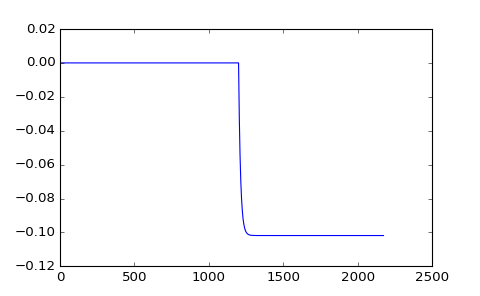

In [4]:
print(len(vitesse(tps)))
fig, ax = plt.subplots(1, 1, figsize=(6, (6/1.6180)))
#ax.axis([-1, len(tps), -0.001, 0.012])
plt.plot(vitesse(tps))

<IPython.core.display.Javascript object>


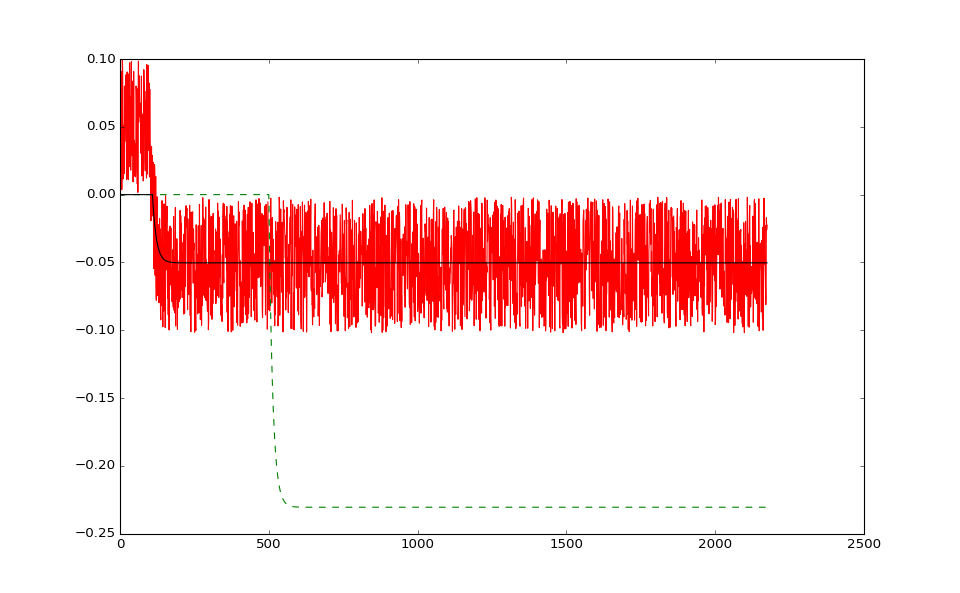

[[Model]]
    Model(vitesse)
[[Fit Statistics]]
    # function evals   = 194
    # data points      = 2175
    # variables        = 3
    chi-square         = 2.062
    reduced chi-square = 0.001
    Akaike info crit   = -15134.034
    Bayesian info crit = -15116.979
[[Variables]]
    tau:     0.013 (fixed)
    xT:      0.04728210 +/- nan      (nan%) (init= 0.065)
    t_T:     0.95767122 +/- nan      (nan%) (init= 0.3)
    start:   108.999948 +/- 3.008045 (2.76%) (init= 500)
    bino:    0 (fixed)



In [5]:
test = vitesse(tps, tau=0.013, xT=0.1, t_T=1, start=100., bino=0)+np.random.rand(len(tps))*0.1


model = Model(vitesse)

params = Parameters()
params.add('tau', value=0.013, vary=False)#, min=0, max=0.05)
params.add('xT', value=0.065, min=0, max=1)
params.add('t_T', value= 0.3, min=0, max=1)
params.add('start', value=500., min=0, max=1500)
params.add('bino', value=0, vary=False)

result = model.fit(test, params, x=tps)


fig, ax = plt.subplots(1, 1, figsize=(12, (12/1.6180)))
ax.plot(tps, test, 'r')
ax.plot(tps, result.init_fit, 'g--')
ax.plot(tps, result.best_fit, 'k')

print(result.fit_report())